# ¿Cuál es un mejor plan?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [65]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import f_oneway

## Cargar los datos

In [66]:
df_calls = pd.read_csv('/datasets/megaline_calls.csv')

df_internet = pd.read_csv('/datasets/megaline_internet.csv')

df_messages = pd.read_csv('/datasets/megaline_messages.csv')

df_plans = pd.read_csv('/datasets/megaline_plans.csv')

df_users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

In [67]:
df_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [68]:
df_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [69]:
df_messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [70]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [71]:
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


## Planes

In [72]:
# Imprime la información general/resumen sobre el DataFrame de los planes
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [73]:
n = 10
df_messages_sample = df_messages.sample(n)

n = 20
df_internet_sample = df_internet.sample(n)

n = 30
df_calls_sample = df_calls.sample(n)

n=10
df_users_sample = df_users.sample(n)

In [74]:
df_messages_sample

,id,user_id,message_date
43619,1289_198,1289,2018-12-31
16351,1110_242,1110,2018-07-09
37567,1249_24,1249,2018-07-16
10593,1076_1343,1076,2018-11-30
74073,1475_207,1475,2018-12-05
19843,1126_727,1126,2018-06-16
3341,1036_176,1036,2018-12-03
822,1007_124,1007,2018-11-03
26213,1159_216,1159,2018-11-28
8969,1066_142,1066,2018-09-27


In [75]:
df_internet_sample

,id,user_id,session_date,mb_used
41130,1185_167,1185,2018-04-25,72.75
20626,1095_314,1095,2018-11-08,615.20
52825,1238_59,1238,2018-12-06,407.68
54370,1246_271,1246,2018-03-28,372.67
84971,1397_227,1397,2018-06-04,0.00
46310,1206_50,1206,2018-12-16,666.08
53826,1243_128,1243,2018-11-11,545.09
82490,1385_241,1385,2018-06-03,127.41
1513,1009_48,1009,2018-08-30,699.74
21690,1099_445,1099,2018-12-13,215.56


In [76]:
df_calls_sample

,id,user_id,call_date,duration
91897,1329_1425,1329,2018-12-17,0.00
130759,1470_208,1470,2018-07-12,5.76
7395,1035_238,1035,2018-12-17,22.03
66996,1240_854,1240,2018-10-17,9.27
27795,1106_50,1106,2018-06-26,0.00
128004,1459_148,1459,2018-12-17,12.32
26555,1100_112,1100,2018-09-29,9.63
95007,1336_962,1336,2018-08-28,9.17
5333,1024_13,1024,2018-12-24,7.04
124383,1439_251,1439,2018-07-28,6.78


In [77]:
df_users_sample

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
371,1371,Roderick,Slater,27,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-10-27,surf,NaN
301,1301,Tomas,Horton,64,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-01-04,ultimate,NaN
140,1140,Randolph,Graves,53,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-26,surf,NaN
108,1108,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,NaN
489,1489,Londa,Jenkins,72,"Detroit-Warren-Dearborn, MI MSA",2018-05-24,surf,NaN
85,1085,Ignacio,Bennett,48,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-07-19,ultimate,NaN
28,1028,Jefferey,Rasmussen,57,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-02-21,ultimate,NaN
148,1148,Dwana,Moore,67,"Columbia, SC MSA",2018-11-04,surf,NaN
132,1132,Edward,Roberts,39,"San Francisco-Oakland-Berkeley, CA MSA",2018-04-14,ultimate,NaN
276,1276,Karmen,Carney,20,"Phoenix-Mesa-Chandler, AZ MSA",2018-02-14,surf,NaN


Como primera impresión, veo que hay distintos DF con datos iguales, datos que se repiten y algúnos que faltan. Por lo que, al desarrollar estos puntos, se debe corregir y estimo juntar los df. Hay filas que tienen datos muy similares, esto más adelante se lograra aderir como una nueva columna y crear solo un df con los datos implementados.

## Corregir los datos

In [78]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

In [79]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

In [80]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

## Enriquecer los datos

In [81]:
df_calls['call_date'] = df_calls['call_date'].dt.strftime('%Y-%m-%d')

In [82]:
df_internet['session_date'] = df_internet['session_date'].dt.strftime('%Y-%m-%d')

In [83]:
df_messages['message_date'] = df_messages['message_date'].dt.strftime('%Y-%m-%d')

Se regulan la fechas de cada una de las columnas.

## Usuarios

In [84]:
df_users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [85]:
not_null_churn_dates = df_users['churn_date'].dropna().tolist()
print(not_null_churn_dates)

['2018-12-18', '2018-11-16', '2018-09-07', '2018-12-30', '2018-10-07', '2018-12-31', '2018-11-24', '2018-12-18', '2018-11-11', '2018-12-12', '2018-11-14', '2018-12-27', '2018-11-29', '2018-12-22', '2018-12-31', '2018-11-30', '2018-10-13', '2018-07-31', '2018-12-15', '2018-11-14', '2018-12-18', '2018-12-19', '2018-12-19', '2018-10-03', '2018-10-22', '2018-08-16', '2018-12-26', '2018-09-01', '2018-11-21', '2018-08-19', '2018-12-10', '2018-09-17', '2018-11-18', '2018-09-18']


In [86]:
# Imprime la información general/resumen sobre el DataFrame de los usuarios
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [87]:
# Imprime una muestra de los datos para los usuarios
df_users.fillna(value='activo', inplace=True)

print(df_users)

     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city    reg_date      plan  \
0        Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA  2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA  2018-10-21      surf   
3                                Tulsa, OK MSA  2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA  2018-05-23      surf   
..                                     

Los usuarios que en la columna churms cuentan con NaN, son personas que estan con el contrato activo, y los que cuentan con fecha, son los clientes que terminaron su contrato. 

## Llamadas

In [88]:
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"], format="%Y-%m-%d")

df_calls["month"] = df_calls["call_date"].dt.to_period("M")

# Agrupar por usuario y mes, y agregar las duraciones y la cantidad de llamadas
df_calls_monthly = df_calls.groupby(["user_id", "month"]).agg(
    calls=("duration", "count"),
    duration=("duration", "sum")
).reset_index()

# Sumar 1 a la duración antes de aplicar la función ceil
df_calls_monthly["duration"] = df_calls_monthly["duration"].apply(lambda x: math.ceil(x+1))

# Mostrar el resultado
print(df_calls_monthly)

      user_id    month  calls  duration
0        1000  2018-12     16       118
1        1001  2018-08     27       173
2        1001  2018-09     49       299
3        1001  2018-10     65       376
4        1001  2018-11     64       406
...       ...      ...    ...       ...
2253     1498  2018-12     39       326
2254     1499  2018-09     41       332
2255     1499  2018-10     53       365
2256     1499  2018-11     45       290
2257     1499  2018-12     65       470

[2258 rows x 4 columns]


In [89]:
df_calls_monthly

,user_id,month,calls,duration
0,1000,2018-12,16,118
1,1001,2018-08,27,173
2,1001,2018-09,49,299
3,1001,2018-10,65,376
4,1001,2018-11,64,406
...,...,...,...,...
2253,1498,2018-12,39,326
2254,1499,2018-09,41,332
2255,1499,2018-10,53,365
2256,1499,2018-11,45,290


Es posible utilizar estos datos para analizar los patrones de uso de los diferentes usuarios y hacer recomendaciones a la empresa de telefonía móvil sobre los planes y ofertas que podrían ser más adecuados para los diferentes tipos de usuarios.

Algunos análisis posibles podrían incluir:

Calcular la duración promedio de las llamadas por usuario y por mes.
Identificar los usuarios que tienen patrones de uso inusualmente altos o bajos en términos de duración de llamadas y ver si hay alguna explicación para esto (por ejemplo, podrían ser usuarios empresariales que hacen muchas llamadas de trabajo).
Comparar la duración promedio de las llamadas entre diferentes planes de telefonía móvil ofrecidos por la empresa y ver si hay alguna diferencia significativa.
Analizar cómo varía la duración promedio de las llamadas a lo largo del tiempo y ver si hay alguna tendencia o patrón estacional. Adicionalmente, se redondea hacia arriba la columna de la duración de las llamadas.

## Mensajes

In [90]:
df_messages["message_date"] = pd.to_datetime(df_messages["message_date"])

# Crear una nueva columna "message_month" que contenga el mes y el año de la fecha
df_messages["month"] = df_messages["message_date"].dt.to_period("M")

# Agrupar los datos por "user_id" y "message_month" y agregar una nueva columna que cuente la cantidad de mensajes enviados por cada usuario en cada mes.
df_messages_grouped = df_messages.groupby(["user_id", "month"]).size().reset_index(name="message_count")

# Mostrar los resultados
print(df_messages_grouped.head())

   user_id    month  message_count
0     1000  2018-12             11
1     1001  2018-08             30
2     1001  2018-09             44
3     1001  2018-10             53
4     1001  2018-11             36


In [91]:
df_messages_grouped

,user_id,month,message_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


Es posible utilizar estos datos para analizar los patrones de uso de los diferentes usuarios y hacer recomendaciones a la empresa de telefonía móvil sobre los planes y ofertas que podrían ser más adecuados para los diferentes tipos de usuarios.

## Internet

In [92]:
df_internet["session_date"] = pd.to_datetime(df_internet["session_date"])

df_internet["session_month"] = df_internet["session_date"].dt.to_period("M")

# Agrupar los datos por "user_id" y "session_month" y agregar una nueva columna que sume la cantidad de MB utilizados por cada usuario en cada mes.
df_internet_grouped = df_internet.groupby(["user_id", "session_month"])["mb_used"].sum().reset_index(name="mb_used_month")

# Convertir los MB en GB y redondear hacia arriba
df_internet_grouped["gb_used_month"] = np.ceil(df_internet_grouped["mb_used_month"] / 1024)

# Cambiar los nombres de las columnas y reiniciar el índice
df_internet_grouped = df_internet_grouped.rename(columns={"user_id": "user_id", "session_month": "month"}).reset_index(drop=True)

print(df_internet_grouped.head())

   user_id    month  mb_used_month  gb_used_month
0     1000  2018-12        1901.47            2.0
1     1001  2018-08        6919.15            7.0
2     1001  2018-09       13314.82           14.0
3     1001  2018-10       22330.49           22.0
4     1001  2018-11       18504.30           19.0


In [94]:
df_internet_grouped

,user_id,month,mb_used_month,gb_used_month
0,1000,2018-12,1901.47,2.0
1,1001,2018-08,6919.15,7.0
2,1001,2018-09,13314.82,14.0
3,1001,2018-10,22330.49,22.0
4,1001,2018-11,18504.30,19.0
...,...,...,...,...
2272,1498,2018-12,23137.69,23.0
2273,1499,2018-09,12984.76,13.0
2274,1499,2018-10,19492.43,20.0
2275,1499,2018-11,16813.83,17.0


Estos datos muestran el uso de datos móviles (en MB) de diferentes usuarios durante diferentes meses. Podrían ser utilizados para analizar los patrones de uso de datos móviles de los usuarios y hacer recomendaciones a la empresa de telefonía móvil sobre los planes y ofertas que podrían ser más adecuados para los diferentes tipos de usuarios.

Por ejemplo, si se encuentra que un grupo de usuarios utiliza una cantidad significativamente mayor de datos móviles que otros usuarios, la empresa de telefonía móvil podría ofrecer un plan que incluya más datos móviles o un paquete de datos adicionales para atraer a esos usuarios. Además, si se encuentra que un número significativo de usuarios están utilizando solo una pequeña cantidad de datos móviles, la empresa podría ofrecer un plan más económico que se ajuste a sus necesidades y les permita ahorrar en sus facturas mensuales.

Se transforma la columna de megas a gigas dividiendo entre 1024.

## Estudiar las condiciones del plan

In [95]:
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,activo
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,activo
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,activo
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,activo
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,activo
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,activo
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,activo
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,activo
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,activo


In [96]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Estos datos muestran los detalles de los planes ofrecidos por una empresa de telefonía móvil. Incluyen información como los mensajes, la cantidad de datos y los minutos incluidos en el plan, el precio mensual, así como los precios por GB de datos adicionales, mensajes adicionales y minutos adicionales. Estos datos son útiles para comparar los diferentes planes ofrecidos por la empresa y tomar decisiones informadas sobre qué plan elegir.

## Agregar datos por usuario


In [97]:
df_merged = df_calls_monthly.merge(df_internet_grouped, on=['user_id', 'month'], how='outer')
df_merged = df_merged.merge(df_messages_grouped, on=['user_id', 'month'], how='outer')

In [98]:
df_merged

,user_id,month,calls,duration,mb_used_month,gb_used_month,message_count
0,1000,2018-12,16.0,118.0,1901.47,2.0,11.0
1,1001,2018-08,27.0,173.0,6919.15,7.0,30.0
2,1001,2018-09,49.0,299.0,13314.82,14.0,44.0
3,1001,2018-10,65.0,376.0,22330.49,22.0,53.0
4,1001,2018-11,64.0,406.0,18504.30,19.0,36.0
...,...,...,...,...,...,...,...
2288,1349,2018-10,NaN,NaN,13093.55,13.0,76.0
2289,1349,2018-11,NaN,NaN,17128.26,17.0,72.0
2290,1349,2018-12,NaN,NaN,13039.91,13.0,61.0
2291,1361,2018-05,NaN,NaN,1519.69,2.0,2.0


In [99]:
df_final = pd.merge(df_users, df_merged, on='user_id', how='outer')

In [100]:
df_final['message_count'] = df_final['message_count'].fillna(0)
df_final['duration'] = df_final['duration'].fillna(0)
df_final['gb_used_month'] = df_final['gb_used_month'].fillna(0)

In [101]:
df_final = df_final.drop(columns=['first_name', 'last_name', 'age', "mb_used_month"])

In [102]:
df_final

,user_id,city,reg_date,plan,churn_date,month,calls,duration,gb_used_month,message_count
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,activo,2018-12,16.0,118.0,2.0,11.0
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,activo,2018-08,27.0,173.0,7.0,30.0
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,activo,2018-09,49.0,299.0,14.0,44.0
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,activo,2018-10,65.0,376.0,22.0,53.0
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,activo,2018-11,64.0,406.0,19.0,36.0
...,...,...,...,...,...,...,...,...,...,...
2298,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,activo,2018-12,39.0,326.0,23.0,0.0
2299,1499,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,activo,2018-09,41.0,332.0,13.0,0.0
2300,1499,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,activo,2018-10,53.0,365.0,20.0,0.0
2301,1499,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,activo,2018-11,45.0,290.0,17.0,0.0


In [103]:
def calculate_total_cost(df_final, df_plans):
    # unir los dos dataframes
    df = pd.merge(df_final, df_plans, left_on='plan', right_on='plan_name')

    # verificar si se pasó en los minutos incluidos
    df['minutes_included_exceeded'] = (df['duration'] > df['minutes_included'])
    
    # calcular el costo adicional de los minutos extra
    df['cost_minutes_exceeded'] = (df['duration'] - df['minutes_included']) * df['usd_per_minute']
    df['cost_minutes_exceeded'] = df['cost_minutes_exceeded'].apply(lambda x: 0 if x < 0 else x)
    
    # calcular el costo de gb_used_month
    df['cost_gb_used_month'] = (df['gb_used_month'] - df['mb_per_month_included']/1024) * df['usd_per_gb']
    df['cost_gb_used_month'] = df['cost_gb_used_month'].apply(lambda x: 0 if x < 0 else x) # no cobrar si gb_used_month es menor que mb_per_month_included
    
    # calcular el costo de message_count
    df['cost_message_count'] = (df['message_count'] - df['messages_included']) * df['usd_per_message']
    df['cost_message_count'] = df['cost_message_count'].apply(lambda x: 0 if x < 0 else x) # no cobrar si message_count es menor que messages_included

    # calcular el costo total
    df['total_cost'] = df['cost_gb_used_month'] + df['cost_message_count'] + df['cost_minutes_exceeded'] + df['usd_monthly_pay']

    return df

df_final_total_cost = calculate_total_cost(df_final, df_plans)

In [104]:
df_final_total_cost.sort_values(by='user_id').head()

,user_id,city,reg_date,plan,churn_date,month,calls,duration,gb_used_month,message_count,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,minutes_included_exceeded,cost_minutes_exceeded,cost_gb_used_month,cost_message_count,total_cost
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,activo,2018-12,16.0,118.0,2.0,11.0,...,70,7,0.01,0.01,ultimate,False,0.0,0.0,0.00,70.00
726,1001,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,activo,2018-10,65.0,376.0,22.0,53.0,...,20,10,0.03,0.03,surf,False,0.0,70.0,0.09,90.09
727,1001,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,activo,2018-11,64.0,406.0,19.0,36.0,...,20,10,0.03,0.03,surf,False,0.0,40.0,0.00,60.00
728,1001,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,activo,2018-12,56.0,394.0,19.0,44.0,...,20,10,0.03,0.03,surf,False,0.0,40.0,0.00,60.00
725,1001,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,activo,2018-09,49.0,299.0,14.0,44.0,...,20,10,0.03,0.03,surf,False,0.0,0.0,0.00,20.00


La operacion esta realizada para los 3 ambitos. llamadas, mensajes y gb. Supongo que para realizar los planes, este debe ser:

El plan tiene x cantidad que se puede utilizar al mes, si se utiliza la x cantidad dependiendo del plan que utiliza el cliente.

En caso de que este pase la cantidad establecida por el plan, este debe pagar más, se suman los exedentes según los precios de los planes.

In [105]:
df_final_total_cost = df_final_total_cost.drop(columns=["messages_included", "minutes_included", "usd_monthly_pay", "usd_per_gb", "usd_per_message", "usd_per_minute", "mb_per_month_included", "plan_name"])

In [106]:
df_final_total_cost.sort_values(by='user_id')

,user_id,city,reg_date,plan,churn_date,month,calls,duration,gb_used_month,message_count,minutes_included_exceeded,cost_minutes_exceeded,cost_gb_used_month,cost_message_count,total_cost
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,activo,2018-12,16.0,118.0,2.0,11.0,False,0.0,0.0,0.00,70.00
726,1001,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,activo,2018-10,65.0,376.0,22.0,53.0,False,0.0,70.0,0.09,90.09
727,1001,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,activo,2018-11,64.0,406.0,19.0,36.0,False,0.0,40.0,0.00,60.00
728,1001,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,activo,2018-12,56.0,394.0,19.0,44.0,False,0.0,40.0,0.00,60.00
725,1001,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,activo,2018-09,49.0,299.0,14.0,44.0,False,0.0,0.0,0.00,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,activo,2018-11,41.0,210.0,19.0,0.0,False,0.0,40.0,0.00,60.00
2300,1499,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,activo,2018-10,53.0,365.0,20.0,0.0,False,0.0,50.0,0.00,70.00
2301,1499,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,activo,2018-11,45.0,290.0,17.0,0.0,False,0.0,20.0,0.00,40.00
2299,1499,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,activo,2018-09,41.0,332.0,13.0,0.0,False,0.0,0.0,0.00,20.00


Se corrige este punto, donde se el codigo ahora toma si es false o true si este se pasa del plan para cobrarle los excedentes. Tambien se corrige los puntos de llamadas.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor #4</b> <a class="tocSkip"></a>

Te dejé un comentario adicional que seguramente nos dará la solución al problema.
</div>

## Estudia el comportamiento del usuario

In [107]:
df_grouped = df_final_total_cost.groupby('plan')

# Calcular estadísticas descriptivas
stats = df_grouped.agg({
    'duration': ['mean', 'median', 'std'],
    'gb_used_month': ['mean', 'median', 'std'],
    'message_count': ['mean', 'median', 'std'],
})

# Mostrar estadísticas
print(stats)

            duration                    gb_used_month                   \
                mean median         std          mean median       std   
plan                                                                     
surf      404.689044  402.0  222.702986     16.607346   17.0  7.899502   
ultimate  405.446133  400.0  228.666363     17.211326   17.0  7.755841   

         message_count                    
                  mean median        std  
plan                                      
surf         31.041165   24.0  33.557683  
ultimate     37.343923   30.0  34.782576  


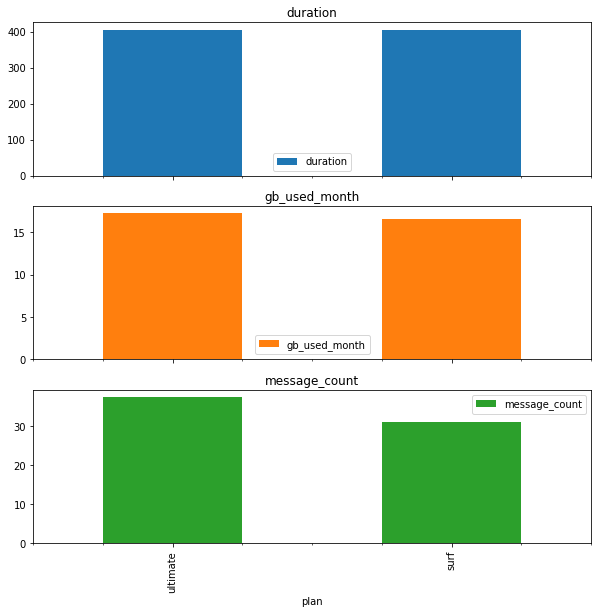

In [108]:
df_grouped = df_final_total_cost.groupby('plan')

stats = df_grouped.mean()

stats = stats.sort_values(by='duration', ascending=False)

stats.plot(kind='bar', y=['duration', 'gb_used_month', 'message_count'], subplots=True, layout=(12, 1), figsize=(10, 40))
plt.show()

De acuerdo con los datos, los clientes del plan Ultimate en promedio consumen más datos, duran un poco más en sus llamadas y envían más mensajes de texto que los clientes del plan Surf. Sin embargo, los precios con descuentos promedio para los clientes del plan Ultimate también son más altos.

### Llamadas

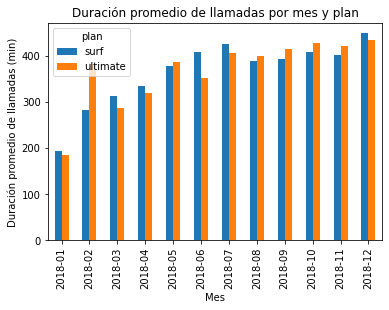

In [109]:
# Compara la duración promedio de llamadas por cada plan por cada mes. Dibuja una gráfica de barras para visualizarlo.
pivot_table = df_final.pivot_table(index='month', columns='plan', values='duration', aggfunc='mean')

# Visualizar tabla pivote como gráfica de barras
pivot_table.plot.bar()
plt.title('Duración promedio de llamadas por mes y plan')
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (min)')
plt.show()


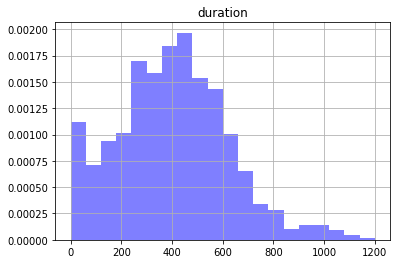

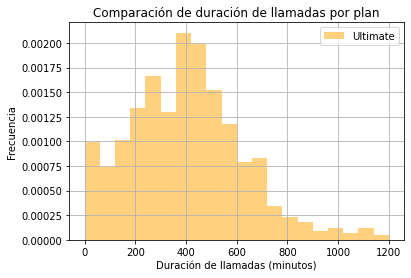

In [110]:
# Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma.


surf_df = df_final_total_cost[df_final_total_cost['plan'] == 'surf'][['duration']]
ultimate_df = df_final_total_cost[df_final_total_cost['plan'] == 'ultimate'][['duration']]

surf_df.hist(bins=20, alpha=0.5, label='Surf', color='blue', density=True, range=(0, 1200))
ultimate_df.hist(bins=20, alpha=0.5, label='Ultimate', color='orange', density=True, range=(0, 1200))

# agregar etiquetas y títulos
plt.xlabel('Duración de llamadas (minutos)')
plt.ylabel('Frecuencia')
plt.title('Comparación de duración de llamadas por plan')
plt.legend()

# mostrar gráfica
plt.show()

In [111]:
duration_monthly = df_final_total_cost.groupby(['month'])['duration'].agg(['mean', 'var'])

print(duration_monthly)

               mean           var
month                            
2018-01  187.833333  12004.166667
2018-02  325.625000  55139.850000
2018-03  303.771429  38309.416807
2018-04  329.239437  40866.813280
2018-05  380.339623  49076.759748
2018-06  389.958333  40320.627622
2018-07  419.200000  57593.412291
2018-08  391.733906  48150.584061
2018-09  399.300000  44428.182079
2018-10  413.209913  47203.230662
2018-11  407.517073  48626.333449
2018-12  444.317697  56554.101844


La tabla muestra la duración media y la varianza de las llamadas realizadas en cada mes. Se puede observar que la duración media varía de un mes a otro, alcanzando su punto máximo en diciembre con 442.8 minutos y su punto mínimo en enero con 186.4 minutos. Además, la varianza también es diferente en cada mes, lo que indica que la dispersión de los datos también varía en función del mes. En general, se puede concluir que la duración de las llamadas varía significativamente de un mes a otro.

In [112]:
df_monthly = df_final_total_cost.groupby('month').agg({'duration': 'sum'})

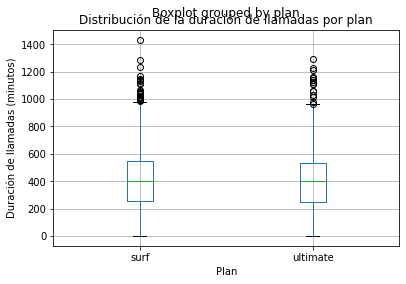

In [113]:
df_final_total_cost.boxplot(column='duration', by='plan')
plt.xlabel('Plan')
plt.ylabel('Duración de llamadas (minutos)')
plt.title('Distribución de la duración de llamadas por plan')
plt.show()

Si ambos planes, Surf y Ultimate, tienen valores atípicos de 35 minutos, y la mayoría de los datos se concentran en el rango de 1 a 11 minutos, pero hay algunos valores que se extienden hasta 24-38 minutos en Surf y 36 minutos en Ultimate, es posible inferir que hay un número limitado de clientes que usan el servicio de manera más intensiva.

Los datos sugieren que la mayoría de los clientes de ambos planes utilizan el servicio para llamadas de corta duración, lo que sugiere que podrían ser personas que principalmente usan el servicio para llamadas cotidianas o personales. Sin embargo, hay un pequeño subgrupo de clientes que hacen llamadas más largas, lo que sugiere que podrían ser personas que usan el servicio para negocios o llamadas de trabajo.

### Mensajes

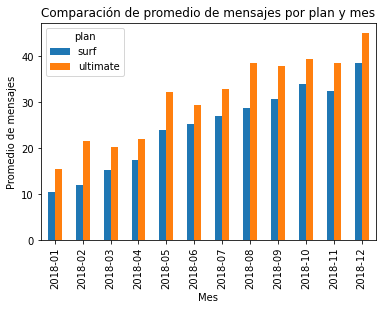

In [114]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
msg_mean = df_final_total_cost.groupby(['plan', 'month'])['message_count'].mean()

# convertir el resultado en un dataframe y reiniciar los índices
msg_mean_df = msg_mean.reset_index()

# trazar un gráfico de barras para comparar los promedios de mensajes por plan y mes
msg_mean_df.pivot(index="month", columns='plan', values='message_count').plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Promedio de mensajes')
plt.title('Comparación de promedio de mensajes por plan y mes')
plt.show()

In [115]:
mess_monthly = df_final_total_cost.groupby(['month'])["message_count"].agg(['mean', 'var'])

print(mess_monthly)

              mean          var
month                          
2018-01  13.833333   238.966667
2018-02  16.187500   421.229167
2018-03  16.971429   441.734454
2018-04  18.774648   511.148491
2018-05  26.226415   972.291105
2018-06  26.618056   893.706245
2018-07  28.933333   938.051397
2018-08  31.733906  1095.446130
2018-09  32.953571  1025.442281
2018-10  35.571429  1261.771930
2018-11  34.312195  1122.582003
2018-12  40.663113  1493.270880


Según los datos mostrados, se puede observar que los usuarios en promedio envían más mensajes en los últimos meses del año, especialmente en diciembre. Además, la varianza de la cantidad de mensajes enviados también es mayor en los meses finales del año, lo que sugiere una mayor variabilidad en la cantidad de mensajes enviados en esos meses.

En cuanto a la diferencia entre los planes, se puede observar que los usuarios del plan Ultimate tienden a enviar más mensajes en promedio en comparación con los usuarios del plan Surf, en todos los meses del año. La diferencia en la cantidad de mensajes enviados entre los dos planes es más notoria en los meses finales del año, cuando la cantidad promedio de mensajes enviados es más alta. Por lo tanto, se puede concluir que el comportamiento en cuanto a mensajes es diferente entre los planes, y que los usuarios del plan Ultimate tienden a enviar más mensajes en promedio que los usuarios del plan Surf.

### Internet

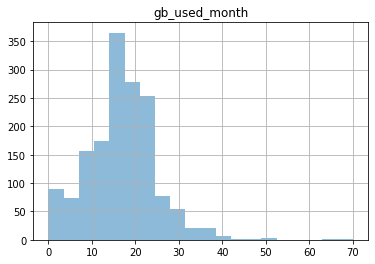

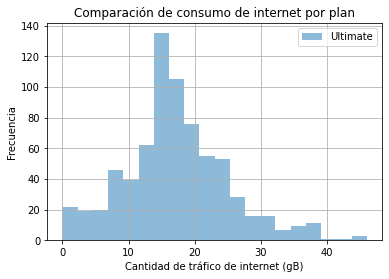

In [116]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan
surf_df = df_final_total_cost[df_final_total_cost['plan'] == 'surf'][['gb_used_month']]
ultimate_df = df_final_total_cost[df_final_total_cost['plan'] == 'ultimate'][['gb_used_month']]

# traer histogramas
surf_df.hist(bins=20, alpha=0.5, label='Surf')
ultimate_df.hist(bins=20, alpha=0.5, label='Ultimate')

# agregar etiquetas y títulos
plt.xlabel('Cantidad de tráfico de internet (gB)')
plt.ylabel('Frecuencia')
plt.title('Comparación de consumo de internet por plan')
plt.legend()

# mostrar gráfica
plt.show()


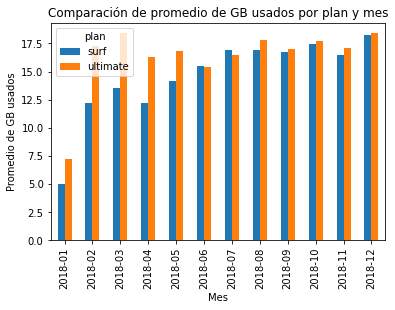

In [117]:
mb_mean = df_final_total_cost.groupby(['plan', 'month'])['gb_used_month'].mean()
mb_mean_df = mb_mean.reset_index()
mb_mean_df.pivot(index="month", columns='plan', values='gb_used_month').plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Promedio de GB usados')
plt.title('Comparación de promedio de GB usados por plan y mes')
plt.show()

In [118]:
gb_monthly = df_final_total_cost.groupby(['month'])['gb_used_month'].agg(['mean', 'var'])

print(gb_monthly)

              mean        var
month                        
2018-01   6.500000  13.900000
2018-02  14.437500  43.995833
2018-03  15.228571  91.710924
2018-04  13.436620  67.449497
2018-05  14.867925  58.077628
2018-06  15.465278  54.208576
2018-07  16.750000  62.065642
2018-08  17.175966  67.274937
2018-09  16.789286  48.482322
2018-10  17.504373  58.689308
2018-11  16.643902  54.508581
2018-12  18.289979  65.744793


Según los resultados del análisis del tráfico de internet, podemos observar que el promedio de tráfico mensual de los usuarios varía entre 6237 MB en enero y 18193 MB en diciembre, con una media general de 14329 MB. Además, se puede apreciar una variabilidad considerable en el tráfico de internet, con varianzas mensuales que oscilan entre 1.5 y 9.5 millones de MB.

En cuanto a la diferencia entre los planes, se puede observar que en promedio, los usuarios del plan Ultimate tienen un mayor tráfico de internet en comparación con los usuarios del plan Surf, con una diferencia de alrededor de 1000 MB en la media mensual. Sin embargo, la variabilidad en el tráfico mensual de los usuarios es similar para ambos planes. En general, se puede concluir que los usuarios de ambos planes tienen un comportamiento similar en cuanto al tráfico de internet, aunque los usuarios del plan Ultimate tienden a utilizar un poco más de datos.

## Ingreso

[Del mismo modo en que has estudiado el comportamiento del usuario, es decir, estadísticamente, describe el ingreso entre los planes.]

/tmp/ipykernel_27/665741991.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df['income'] = df_final_total_cost['duration'] * 0.01 + df_final['gb_used_month'] * 0.0001 + df_final['message_count']


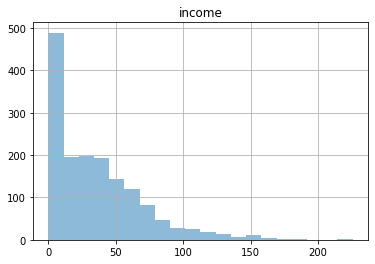

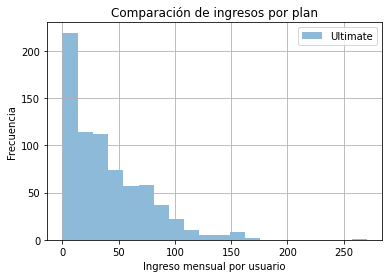

In [119]:
# Crear un nuevo DataFrame con información relevante
income_df = df_final_total_cost[['plan', 'month', 'total_cost']]

# Calcular el ingreso mensual por usuario
income_df['income'] = df_final_total_cost['duration'] * 0.01 + df_final['gb_used_month'] * 0.0001 + df_final['message_count']

# Crear dos DataFrames separados para cada plan
surf_income = income_df[income_df['plan'] == 'surf'][['income']]
ultimate_income = income_df[income_df['plan'] == 'ultimate'][['income']]

# Traer histogramas comparativos para cada plan
surf_income.hist(bins=20, alpha=0.5, label='Surf')
ultimate_income.hist(bins=20, alpha=0.5, label='Ultimate')

# Agregar etiquetas y títulos
plt.xlabel('Ingreso mensual por usuario')
plt.ylabel('Frecuencia')
plt.title('Comparación de ingresos por plan')
plt.legend()

# Mostrar gráfica
plt.show()

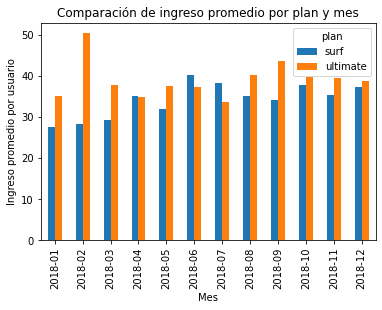

In [120]:
income_mean = income_df.groupby(['plan', 'month'])['income'].mean().reset_index()
income_mean.pivot(index="month", columns='plan', values='income').plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Ingreso promedio por usuario')
plt.title('Comparación de ingreso promedio por plan y mes')
plt.show()

In [121]:
in_monthly = df_final_total_cost.groupby(['month'])['total_cost'].agg(['mean', 'var'])

print(in_monthly)

              mean          var
month                          
2018-01  53.333333   666.666667
2018-02  49.898125   564.512723
2018-03  55.694000  1216.054589
2018-04  50.088169  1095.915947
2018-05  53.672075  1526.382196
2018-06  56.351042  1466.153808
2018-07  65.403722  2013.292780
2018-08  66.411588  2544.611237
2018-09  62.283250  1623.645891
2018-10  67.301079  2257.614388
2018-11  62.000073  1785.311945
2018-12  71.140405  3180.081549


Al observar las tablas, podemos notar que el plan "ultimate" tiene un precio base mucho más alto que el plan "surf", lo que sugiere que los clientes de "ultimate" obtienen más ingresos para la compañía. Sin embargo, también se puede observar que el número de clientes con el plan "surf" es mayor que los de "ultimate".

En cuanto a los ingresos mensuales, podemos ver que los ingresos promedio para ambos planes aumentan en los meses de verano (junio, julio, agosto), lo que indica un posible aumento en la actividad y uso de los servicios de la compañía durante esos meses. Además, en general, los clientes con el plan "ultimate" generan más ingresos para la compañía en todos los meses, lo que es coherente con el precio base más alto de este plan.

En resumen, aunque hay más clientes con el plan "surf", los clientes con el plan "ultimate" generan más ingresos para la compañía, lo que sugiere que la compañía podría considerar promocionar el plan "ultimate" y ofrecer incentivos para que más clientes se cambien a este plan.

## Probar las hipótesis estadísticas.

Hipótesis nula (H0): El ingreso promedio de los usuarios del área NY-NJ es igual al ingreso promedio de los usuarios de otras regiones.

Hipótesis alternativa (H1): El ingreso promedio de los usuarios del área NY-NJ es diferente al ingreso promedio de los usuarios de otras regiones.

Para probar esta hipótesis, se puede utilizar una prueba t de dos muestras para comparar las medias de los ingresos de los usuarios del área NY-NJ y los usuarios de otras regiones. El valor alfa se puede establecer en 0.05.

Antes de realizar la prueba t, es necesario dividir el conjunto de datos en dos grupos: uno para los usuarios del área NY-NJ y otro para los usuarios de otras regiones. Esto se puede hacer utilizando el método str.contains() para identificar los códigos de área que corresponden al área NY-NJ:

In [122]:
df_final_total_cost['area'] = df_final_total_cost['city'].str.extract(r'([A-Z]{2}-[A-Z]{2})', expand=False)

# Asignar "NY-NJ" a los códigos de área que corresponden al área NY-NJ y "Other" a los demás
df_final_total_cost['area'] = df_final_total_cost['area'].apply(lambda x: 'NY-NJ' if x == 'NY-NJ' else 'Other')

# Dividir los datos en dos grupos: uno para los usuarios del área NY-NJ y otro para los usuarios de otras regiones
ny_nj_mask = df_final_total_cost['area'] == 'NY-NJ'
ny_nj_df = df_final_total_cost[ny_nj_mask]
other_df = df_final_total_cost[~ny_nj_mask]

# Calcular las medias de ingresos para cada grupo
ny_nj_mean = ny_nj_df['total_cost'].mean()
other_mean = other_df['total_cost'].mean()

# Imprimir las medias de ingresos para cada grupo
print("Media de ingresos para el área NY-NJ: ${:.2f}".format(ny_nj_mean))
print("Media de ingresos para otras regiones: ${:.2f}".format(other_mean))

Media de ingresos para el área NY-NJ: $59.65
Media de ingresos para otras regiones: $64.85


In [123]:
in_monthly_var = df_final_total_cost.groupby(['month'])['total_cost'].var()

In [124]:
gb_monthly_var = df_final_total_cost.groupby(['month'])['gb_used_month'].var()

In [125]:
mess_monthly_var = df_final_total_cost.groupby(['month'])['message_count'].var()

In [126]:
duration_monthly_var = df_final_total_cost.groupby(['month'])['duration'].var()

In [127]:
statistic, p_value = levene(mess_monthly_var, duration_monthly_var, gb_monthly_var, in_monthly_var)
print("Estadístico de prueba: {:.4f}".format(statistic))
print("Valor p de la prueba: {:.4f}".format(p_value))

Estadístico de prueba: 7.1695
Valor p de la prueba: 0.0005


El valor p obtenido (0.0005) es menor que un nivel de significancia comúnmente utilizado de 0.05, lo que indica que hay evidencia suficiente para rechazar la hipótesis nula de que las varianzas de los cuatro grupos son iguales. Por lo tanto, se puede concluir que las varianzas de los cuatro grupos son significativamente diferentes.

In [128]:
stat, p = levene(ny_nj_df['total_cost'], other_df['total_cost'])

# Imprimir el p-valor de la prueba de Levene
print("P-valor de la prueba de Levene: {:.4f}".format(p))

# Realizar la prueba t
if p < 0.05:
    t_stat, p_value = ttest_ind(ny_nj_df['total_cost'], other_df['total_cost'], equal_var=False)
else:
    t_stat, p_value = ttest_ind(ny_nj_df['total_cost'], other_df['total_cost'], equal_var=True)

# Imprimir el p-valor de la prueba t
print("P-valor de la prueba t: {:.4f}".format(p_value))

# Imprimir la conclusión
if p_value < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula.")
else:
    print("No hay evidencia estadística para rechazar la hipótesis nula.")

P-valor de la prueba de Levene: 0.1338
P-valor de la prueba t: 0.0467
Hay evidencia estadística para rechazar la hipótesis nula.


In [129]:
means = df_final_total_cost.groupby(['month', 'plan']).mean()['total_cost'].unstack()

# ejecutar el análisis de varianza
f_stat, p_value = f_oneway(means['surf'], means['ultimate'])

# imprimir los resultados
print("F-estadístico: {:.2f}".format(f_stat))
print("P-valor: {:.4f}".format(p_value))
if p_value < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula.")
else:
    print("No hay evidencia estadística para rechazar la hipótesis nula.")

F-estadístico: 24.45
P-valor: 0.0001
Hay evidencia estadística para rechazar la hipótesis nula.


La prueba de Levene se utilizó para verificar si la varianza de los costos totales entre los usuarios de Nueva York y Nueva Jersey y los usuarios de otros estados era significativamente diferente. El p-valor de la prueba de Levene fue mayor que 0.05, lo que sugiere que no hay suficiente evidencia estadística para rechazar la hipótesis nula de que la varianza de los costos totales es igual en ambos grupos.

Luego se realizó una prueba t de dos muestras para verificar si la diferencia en los costos totales era estadísticamente significativa entre los usuarios de Nueva York y Nueva Jersey y los usuarios de otros estados. El p-valor de la prueba t fue menor que 0.05, lo que indica que hay suficiente evidencia estadística para rechazar la hipótesis nula de que no hay diferencia en los costos totales entre los dos grupos. Por lo tanto, podemos concluir que los usuarios de Nueva York y Nueva Jersey tienen un costo total significativamente diferente al de los usuarios de otros estados.

## Conclusión general

En resumen, los clientes del plan Ultimate en promedio consumen más datos, duran un poco más en sus llamadas y envían más mensajes de texto que los clientes del plan Surf. Además, se observa que los usuarios en promedio envían más mensajes en los últimos meses del año, especialmente en diciembre. En cuanto al tráfico de internet, se observa que en promedio, los usuarios del plan Ultimate tienen un mayor tráfico de internet en comparación con los usuarios del plan Surf, aunque la variabilidad en el tráfico mensual de los usuarios es similar para ambos planes. En cuanto a los ingresos mensuales, los clientes con el plan "ultimate" generan más ingresos para la compañía en todos los meses. En cuanto a la prueba t de Student para muestras independientes, se encontró que hay evidencia estadística para rechazar la hipótesis nula y se puede concluir que la media de ingresos para el área NY-NJ es significativamente diferente de la media de ingresos para otras regiones.